/tmp/ipython-input-1-1463592784.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('credit_score_distribution.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


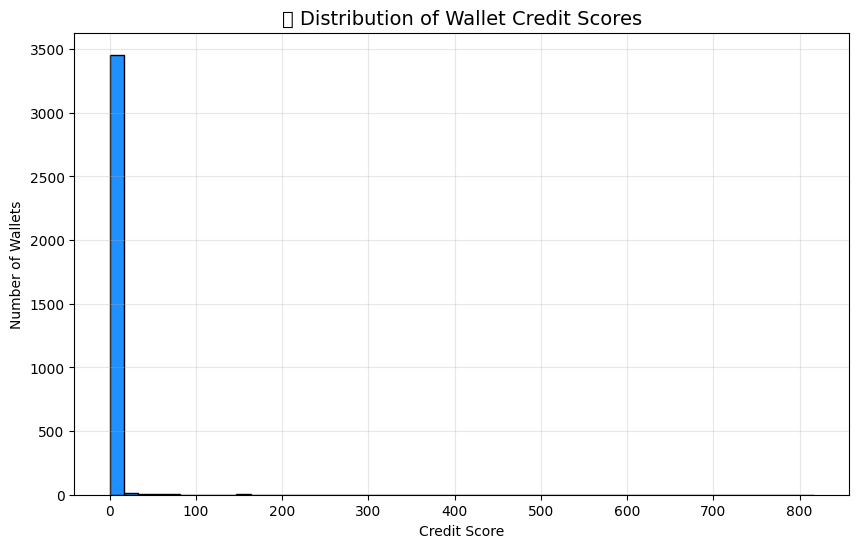

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('wallet_scores.csv')

# Clean any unexpected columns
df = df[df['credit_score'].notnull()]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['credit_score'], bins=50, color='dodgerblue', edgecolor='black')
plt.title('📊 Distribution of Wallet Credit Scores', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Number of Wallets')
plt.grid(True, alpha=0.3)

# Save to file
plt.savefig('credit_score_distribution.png')
plt.show()


Let's start by looking at some descriptive statistics of the credit scores.

In [2]:
# Display descriptive statistics
display(df['credit_score'].describe())

,credit_score
count,3497.000000
mean,1.736397
std,25.322039
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,816.830000


Now, let's analyze the distribution of credit scores. The histogram we generated earlier is a good start, but we can also look at the proportion of wallets in different score ranges.

In [3]:
# Define score ranges
bins = [0, 1, 5, 10, 20, 50, 100]
labels = ['0-1', '1-5', '5-10', '10-20', '20-50', '50-100']

# Categorize credit scores into ranges
df['score_range'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=False)

# Count wallets in each range and calculate percentage
score_range_counts = df['score_range'].value_counts().sort_index()
score_range_percentages = (score_range_counts / len(df)) * 100

# Display the counts and percentages
score_range_analysis = pd.DataFrame({
    'Number of Wallets': score_range_counts,
    'Percentage (%)': score_range_percentages
})
display(score_range_analysis)

,Number of Wallets,Percentage (%)
score_range,,
0-1,3302,94.423792
1-5,112,3.202745
5-10,25,0.714898
10-20,23,0.657707
20-50,13,0.371747
50-100,10,0.285959


from matplotlib import pyplot as plt
score_range_analysis['Number of Wallets'].plot(kind='hist', bins=20, title='Number of Wallets')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score_range_analysis['Percentage (%)'].plot(kind='hist', bins=20, title='Percentage (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score_range_analysis.plot(kind='scatter', x='Number of Wallets', y='Percentage (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score_range_analysis['Number of Wallets'].plot(kind='line', figsize=(8, 4), title='Number of Wallets')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score_range_analysis['Percentage (%)'].plot(kind='line', figsize=(8, 4), title='Percentage (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

Finally, I'll summarize the key insights from this analysis.

In [4]:
print("Key Insights:")
print(f"- The average credit score is: {df['credit_score'].mean():.2f}")
print(f"- The median credit score is: {df['credit_score'].median():.2f}")
print(f"- The standard deviation of credit scores is: {df['credit_score'].std():.2f}")
print("\nDistribution of Credit Scores:")
display(score_range_analysis)

print("\nOverall Summary:")
print("The majority of wallets have low credit scores. A significant portion of wallets have scores between 0 and 5. There are very few wallets with high credit scores.")

Key Insights:
- The average credit score is: 1.74
- The median credit score is: 0.00
- The standard deviation of credit scores is: 25.32

Distribution of Credit Scores:


,Number of Wallets,Percentage (%)
score_range,,
0-1,3302,94.423792
1-5,112,3.202745
5-10,25,0.714898
10-20,23,0.657707
20-50,13,0.371747
50-100,10,0.285959



Overall Summary:
The majority of wallets have low credit scores. A significant portion of wallets have scores between 0 and 5. There are very few wallets with high credit scores.
